In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
cancer_df=pd.read_csv('data.csv')

In [4]:
cancer_df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [15]:
#dropping unnecessary column
cancer_df=cancer_df.drop('id', axis=1)

In [16]:
cancer_df=cancer_df.drop('Unnamed: 32', axis=1)

In [17]:
cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [18]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

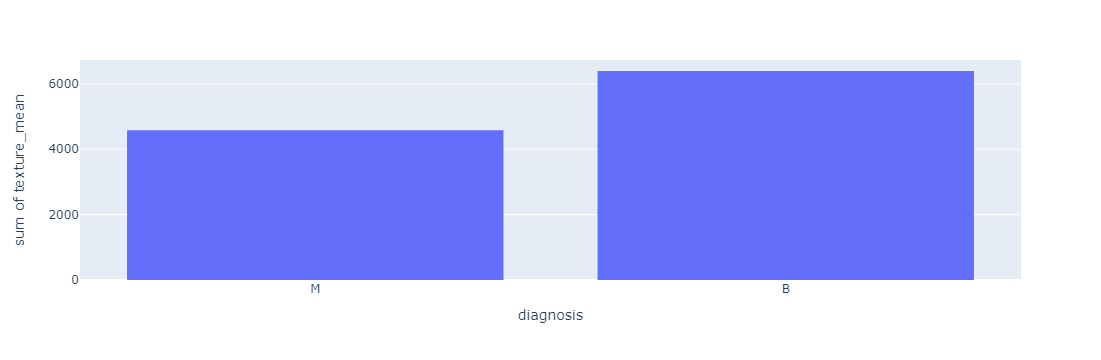

In [19]:
px.histogram(cancer_df,x='diagnosis',y='texture_mean')


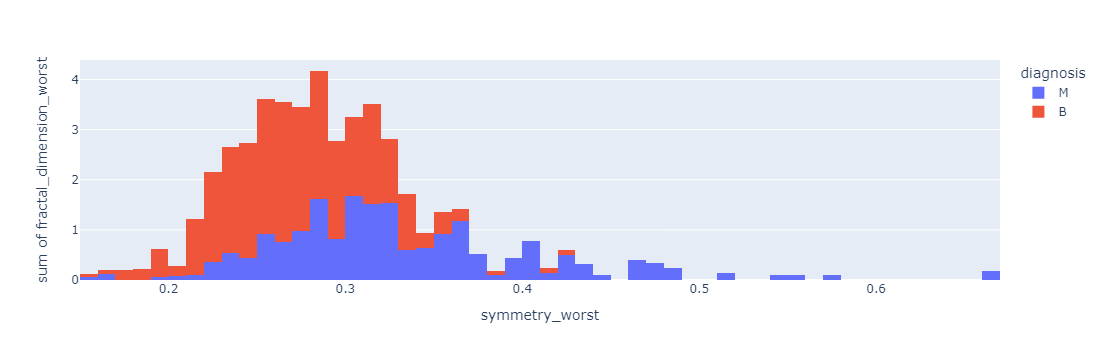

In [20]:
px.histogram(cancer_df,x='symmetry_worst',y='fractal_dimension_worst',color='diagnosis')

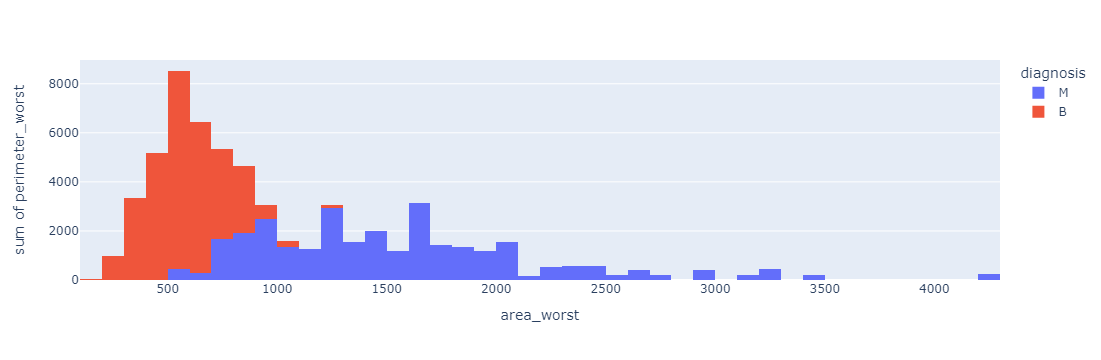

In [21]:
px.histogram(cancer_df,x='area_worst',y='perimeter_worst',color='diagnosis')

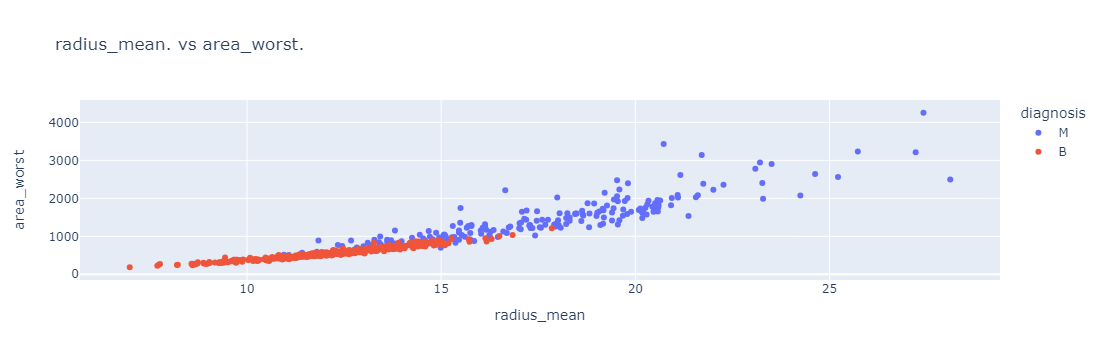

In [22]:
px.scatter(cancer_df, 
           title='radius_mean. vs area_worst.',
           x='radius_mean', 
           y='area_worst', 
           color='diagnosis')

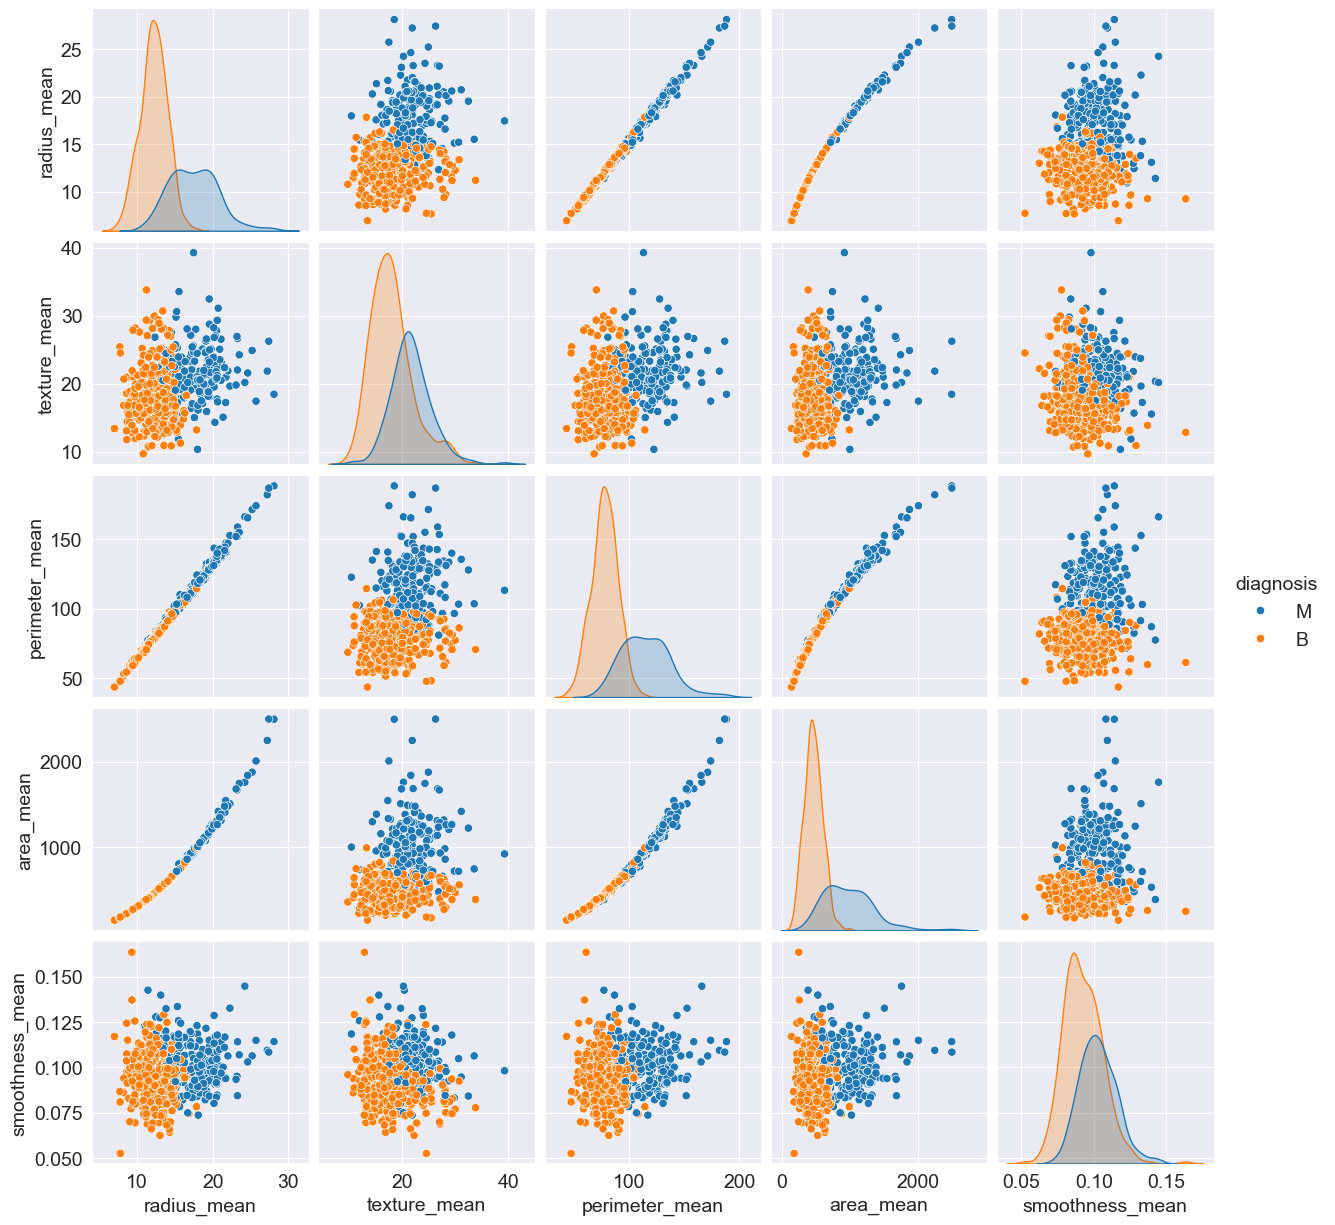

In [23]:
# pair plot of sample feature
sns.pairplot(cancer_df, hue = 'diagnosis', 
             vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'] )

<Axes: xlabel='diagnosis', ylabel='count'>

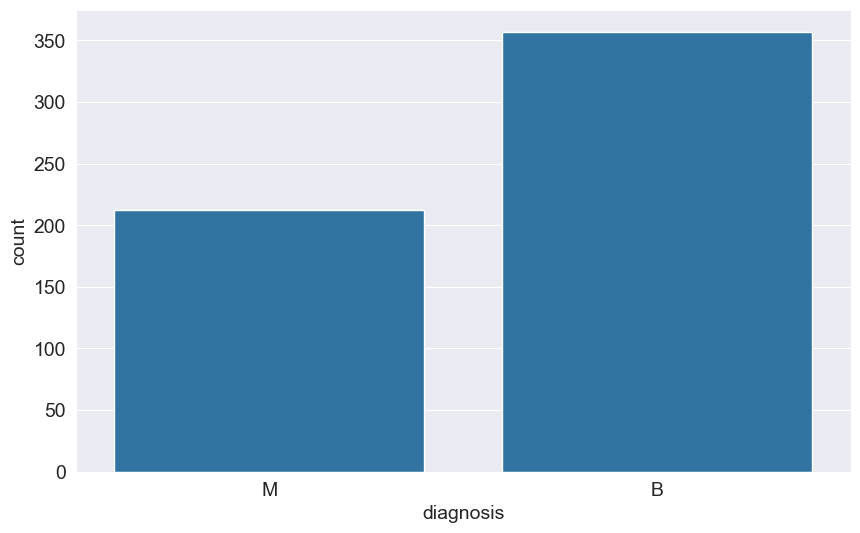

In [24]:
# Count the target class
sns.countplot(cancer_df,x='diagnosis')

In [32]:
diagnosis_values={'M':1,'B':0}
cancer_df['diagnosis_numeric'] = cancer_df.diagnosis.map(diagnosis_values)
cancer_df=cancer_df.drop('diagnosis',axis=1)
cancer_df.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_numeric
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


We have assigned the value 1 for Malignant and 0 for Benign. This is to easen with the numeric operations.

<Axes: >

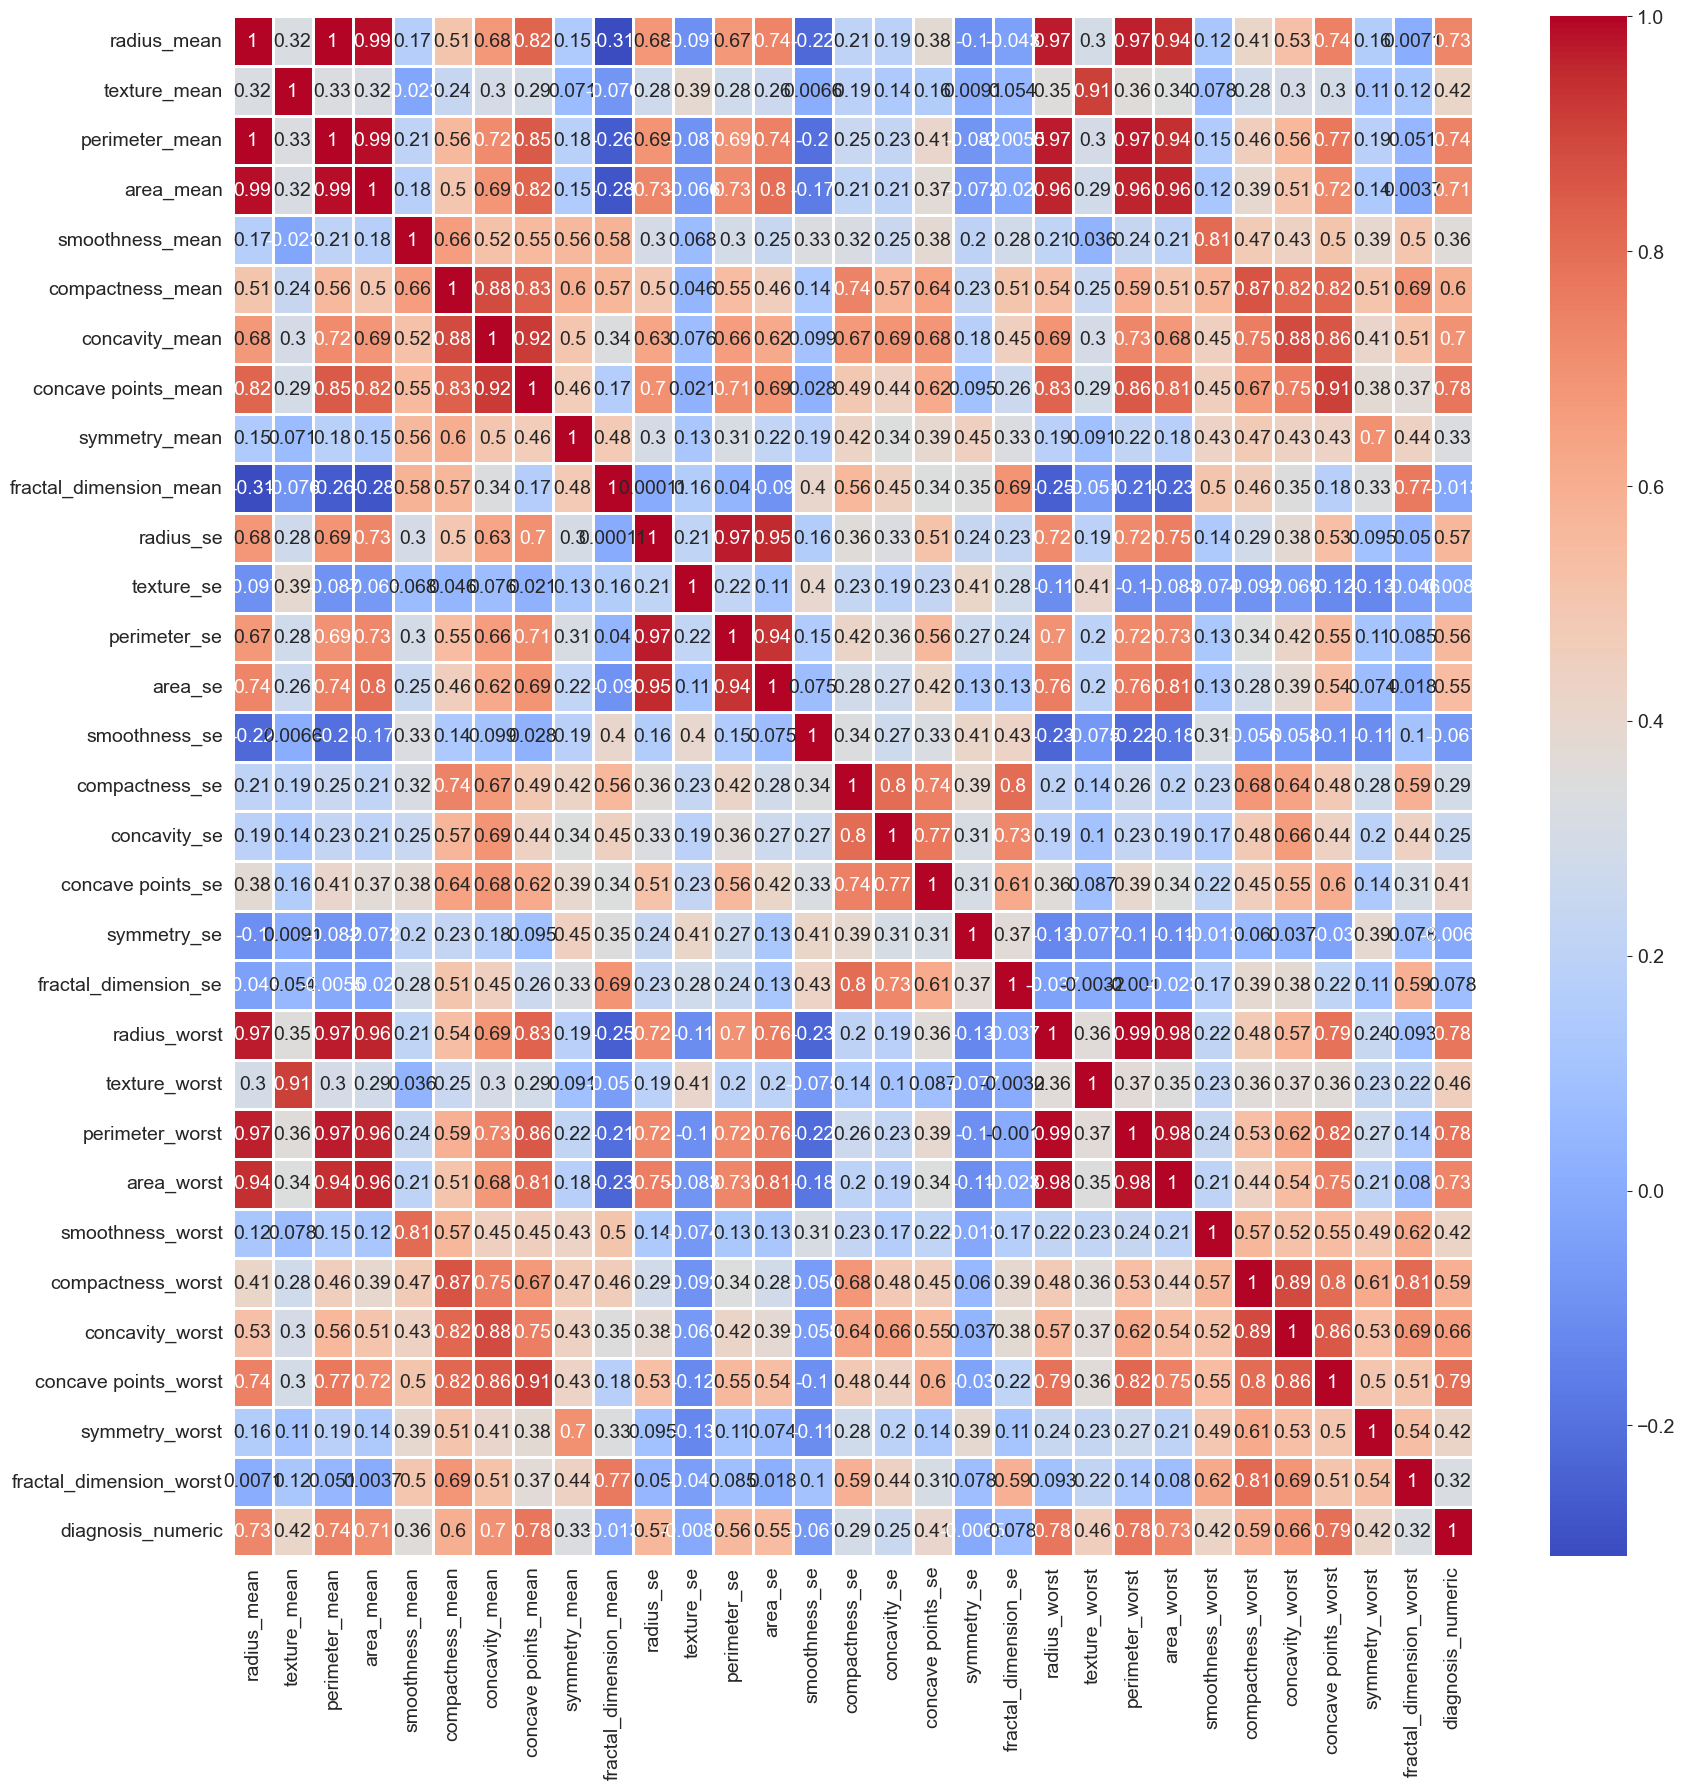

In [26]:
# Heatmap of Correlation matrix of breast cancer DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.corr(numeric_only=True), annot = True, cmap ='coolwarm', linewidths=2)

In [27]:
correlation=cancer_df.corrwith(cancer_df['diagnosis_numeric'],numeric_only=True)
correlation

radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0

We can pick the columns with a correlation of 0.7 and above as the primary columns that determine the decision of the diagnosis

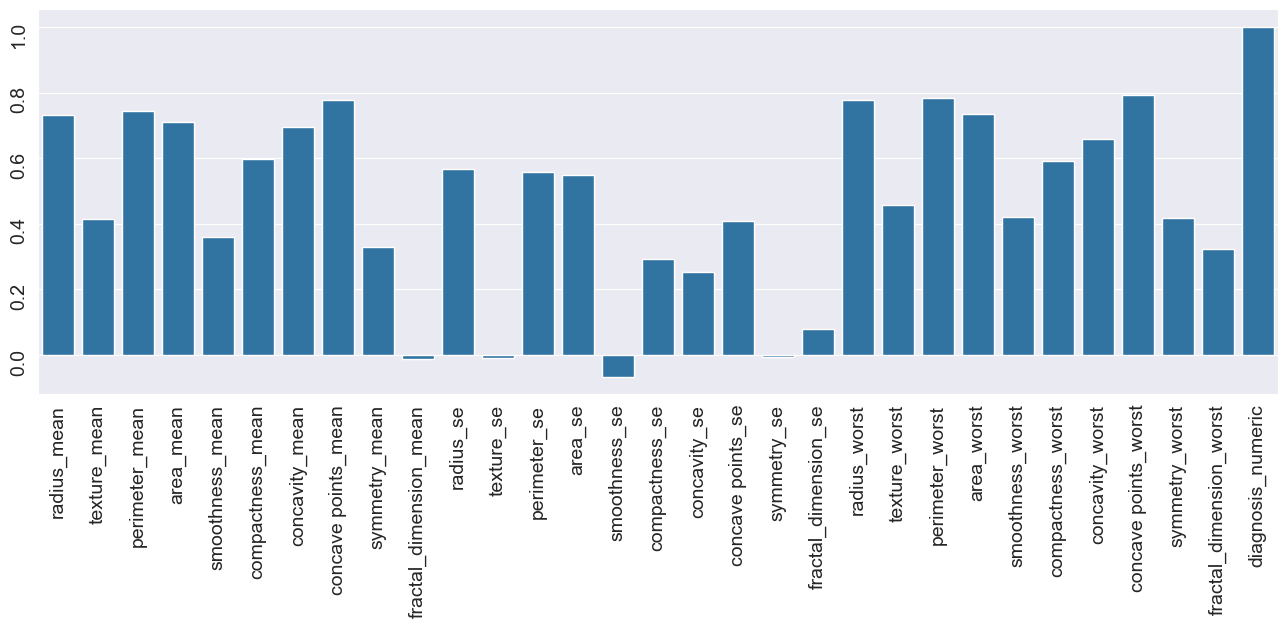

In [28]:
plt.figure(figsize = (16,5))
ax = sns.barplot(cancer_df.corrwith(cancer_df['diagnosis_numeric'],numeric_only=True))
ax.tick_params(labelrotation = 90)

In [34]:
cancer_df.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_numeric
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


In [35]:
cancer_df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_numeric'],
      dtype='object')

In [36]:
input_cols = list(cancer_df.columns)[:-1]
target_col = 'diagnosis_numeric'

In [38]:
train_val_df, test_df = train_test_split(cancer_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [39]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (341, 31)
val_df.shape : (114, 31)
test_df.shape : (114, 31)


In [43]:
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

In [49]:

train_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,21.53,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625
418,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,...,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464
385,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836


In [50]:
train_targets

217    0
283    1
0      1
504    0
251    0
      ..
57     1
492    1
418    0
385    1
325    0
Name: diagnosis_numeric, Length: 341, dtype: int64

In [52]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(cancer_df.iloc[:, :-1])

MinMaxScaler()

In [56]:
train_inputs = scaler.transform(train_inputs)
val_inputs = scaler.transform(val_inputs)
test_inputs = scaler.transform(test_inputs)

In [57]:
X_train = train_inputs
X_val = val_inputs
X_test = test_inputs

In [61]:
model = LogisticRegression(solver='liblinear')

In [62]:
model.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

In [65]:
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

0.9736070381231672

In [66]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 95.61%
Accuracy: 96.49%


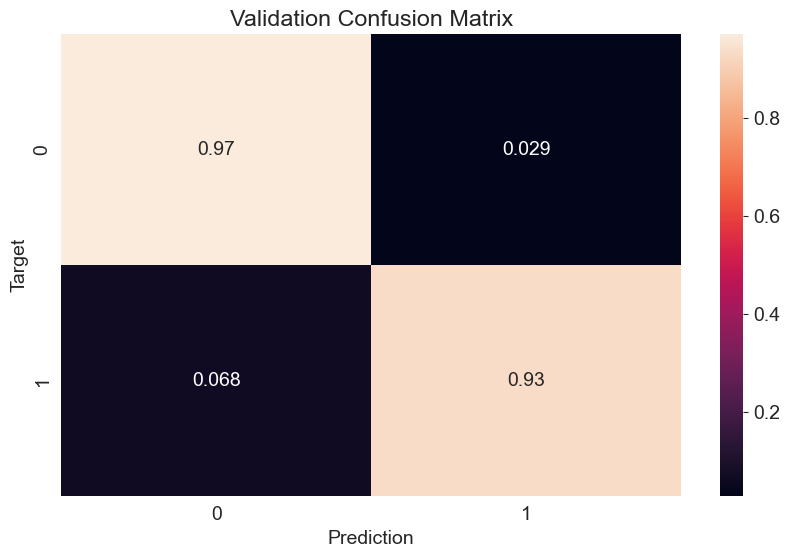

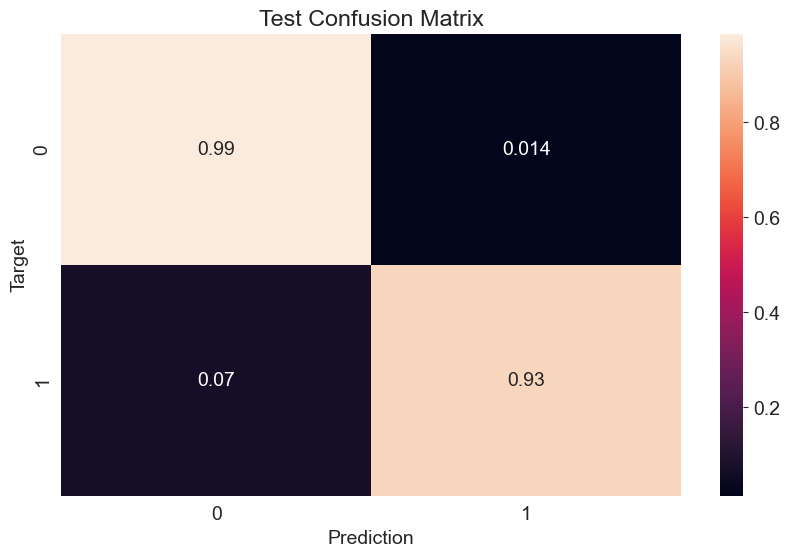

In [69]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [70]:
breast_tumor = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
}

In [71]:
joblib.dump(breast_tumor, 'breast_tumor.joblib')

['breast_tumor.joblib']